In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [202]:
# get keep / discard info
df = pd.read_json('./out_data/export-result.ndjson', lines=True)

ID = []
batch = []
keep1 = []
keep2 = []

for index in range(df.shape[0]):
    ID.append(df['data_row'][index]['external_id'].split('.')[0])
    batch.append(df['data_row'][index]['details']['dataset_name'])
    try:
        keep1.append(df['projects'][index]['clpu83kju05n807xg83enhpst']['labels'][0]['annotations']['classifications'][0]['checklist_answers'][0]['name'])
    except IndexError:
        keep1.append(np.nan)
    try:    
        keep2.append(df['projects'][index]['clpu83kju05n807xg83enhpst']['labels'][1]['annotations']['classifications'][0]['checklist_answers'][0]['name'])
    except IndexError: 
        keep2.append(np.nan)


In [205]:
index = (np.array(keep1) == 'Keep') | (np.array(keep2) == 'Keep') & (np.array(batch)=='neuronbatch11012023_cellrox_bodipy')

In [211]:
keep_IDs = set(np.array(ID)[index])

In [214]:
# load data
data = pd.read_csv('./out_data/neuronbatch11012023_cellrox_bodipy_data.csv')

# only keep randIDs with IDs in keep

In [215]:
df_filtered = data[[str(x) in keep_IDs for x in data['randID']]]

In [216]:
df_filtered

,filename,ID,batch,well_name,slurm_name,treatment,line,randID,DAPI,NeuN,bodipy,cellrox,cellvolume,Npoints,bodipy-b,cellrox-b,DAPI_per_point,NeuN_per_point,bodipy-b_per_point,cellrox-b_per_point
0,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,33.059766,1146.090664,18.626453,149.230213,943.233631,2423.0,18.613011,149.222644,0.013644,0.473005,0.007682,0.061586
1,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,39.629045,129.778265,17.365263,14.940129,451.568721,1160.0,17.351822,14.932561,0.034163,0.111878,0.014958,0.012873
2,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,35.582308,50.565402,9.283115,7.854267,234.348595,602.0,9.269673,7.846699,0.059107,0.083996,0.015398,0.013034
3,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,63.803206,112.051848,12.507160,10.136277,414.976084,1066.0,12.493719,10.128708,0.059853,0.105114,0.011720,0.009502
4,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,124.304662,223.186514,450.626801,23.699077,806.595164,2072.0,450.613360,23.691509,0.059993,0.107715,0.217477,0.011434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,93.393736,248.328755,38.487728,28.299214,556.675234,1430.0,38.478632,28.292180,0.065310,0.173656,0.026908,0.019785
4389,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,59.756446,91.228437,45.047384,19.467528,372.544195,957.0,45.038288,19.460494,0.062441,0.095328,0.047062,0.020335
4390,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,65.993473,125.804864,28.740419,21.620617,452.347288,1162.0,28.731323,21.613583,0.056793,0.108266,0.024726,0.018600
4391,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,31.498295,41.352932,8.639671,9.118147,182.573905,469.0,8.630574,9.111113,0.067161,0.088173,0.018402,0.019427


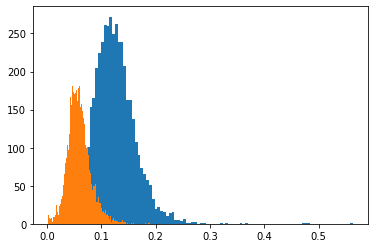

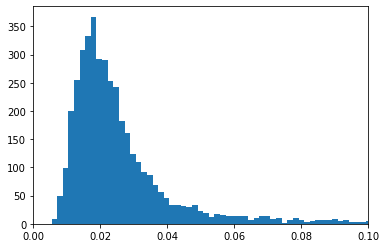

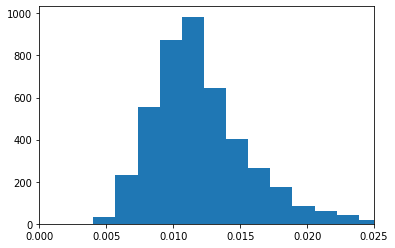

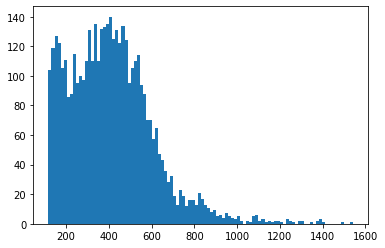

In [217]:
plt.hist(df_filtered['NeuN_per_point'], 100)
None
plt.hist(df_filtered['DAPI_per_point'], 100)
None
plt.figure()
plt.hist(df_filtered['bodipy-b_per_point'], 500)
plt.xlim(0,0.1)
None
plt.figure()
plt.hist(df_filtered['cellrox-b_per_point'], 500)
plt.xlim(0,0.025)
None
plt.figure()
plt.hist(df_filtered['cellvolume'], 100)
None

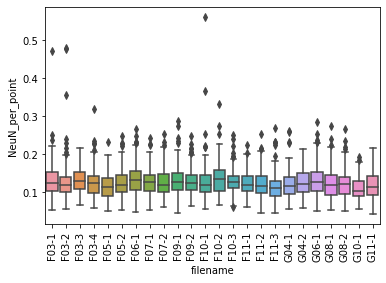

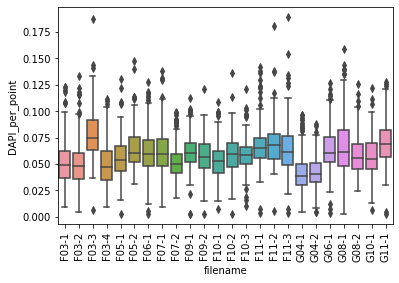

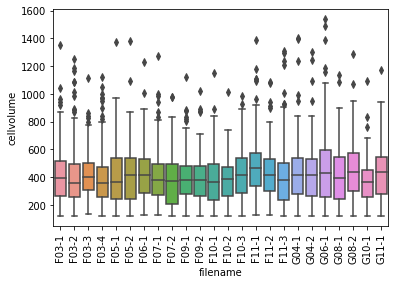

In [236]:
sns.boxplot(x='filename', y='NeuN_per_point', data=df_filtered)
plt.xticks(rotation=90)
None
plt.figure()
sns.boxplot(x='filename', y='DAPI_per_point', data=df_filtered)
plt.xticks(rotation=90)
None
plt.figure()
sns.boxplot(x='filename', y='cellvolume', data=df_filtered)
plt.xticks(rotation=90)
None

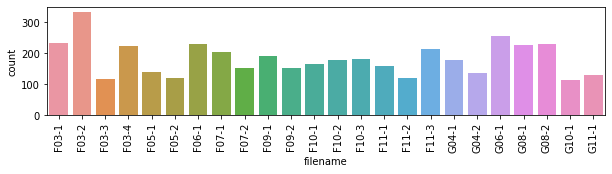

In [237]:
plt.figure(figsize=(10,2))
sns.countplot(x='filename', data=df_filtered)
plt.xticks(rotation=90)
None


In [243]:
df_filtered

,filename,ID,batch,well_name,slurm_name,treatment,line,randID,DAPI,NeuN,bodipy,cellrox,cellvolume,Npoints,bodipy-b,cellrox-b,DAPI_per_point,NeuN_per_point,bodipy-b_per_point,cellrox-b_per_point
0,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,33.059766,1146.090664,18.626453,149.230213,943.233631,2423.0,18.613011,149.222644,0.013644,0.473005,0.007682,0.061586
1,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,39.629045,129.778265,17.365263,14.940129,451.568721,1160.0,17.351822,14.932561,0.034163,0.111878,0.014958,0.012873
2,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,35.582308,50.565402,9.283115,7.854267,234.348595,602.0,9.269673,7.846699,0.059107,0.083996,0.015398,0.013034
3,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,63.803206,112.051848,12.507160,10.136277,414.976084,1066.0,12.493719,10.128708,0.059853,0.105114,0.011720,0.009502
4,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24464390_0.out,vehicle,Y622,3546248239,124.304662,223.186514,450.626801,23.699077,806.595164,2072.0,450.613360,23.691509,0.059993,0.107715,0.217477,0.011434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,93.393736,248.328755,38.487728,28.299214,556.675234,1430.0,38.478632,28.292180,0.065310,0.173656,0.026908,0.019785
4389,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,59.756446,91.228437,45.047384,19.467528,372.544195,957.0,45.038288,19.460494,0.062441,0.095328,0.047062,0.020335
4390,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,65.993473,125.804864,28.740419,21.620617,452.347288,1162.0,28.731323,21.613583,0.056793,0.108266,0.024726,0.018600
4391,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24464390_23.out,DGAT1/2i,Y622,1794519497,31.498295,41.352932,8.639671,9.118147,182.573905,469.0,8.630574,9.111113,0.067161,0.088173,0.018402,0.019427


array(['CDP-choline', 'DGAT1/2i', 'GW501516', 'rosiglitazone',
       'sn-glycero-3-phosphocholine'], dtype=object)

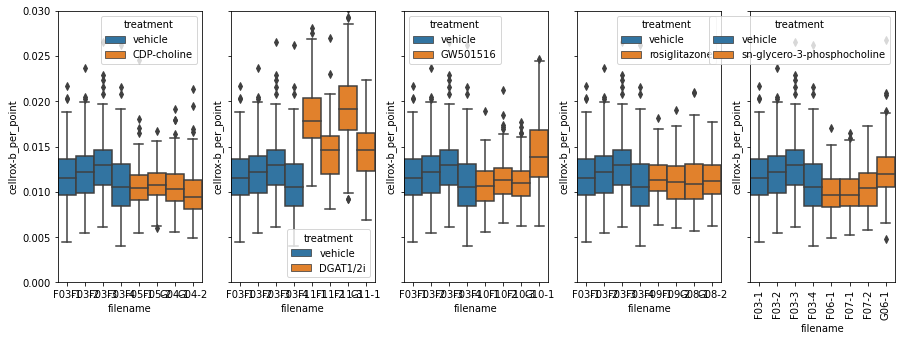

<Figure size 432x288 with 0 Axes>

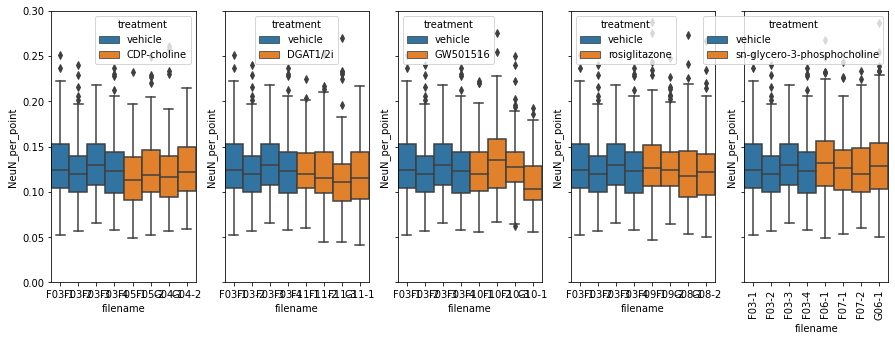

<Figure size 432x288 with 0 Axes>

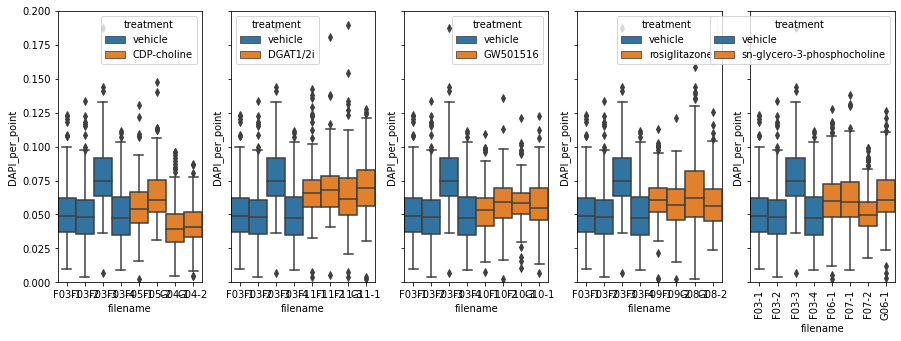

<Figure size 432x288 with 0 Axes>

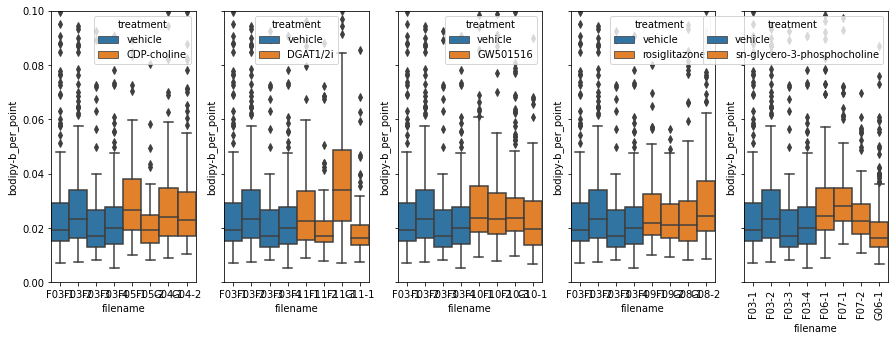

In [327]:
treatment = np.unique(df_filtered['treatment'])
treatment = treatment[:-1]
f, ax = plt.subplots(1,len(treatment), sharey=True,  figsize=(15, 5))#, gridspec_kw={"width_ratios": (1,.5,.5,.5,.5,.5)})

for i, T in enumerate(treatment):
    sub = df_filtered[(df_filtered['treatment']==T) | (df_filtered['treatment']=='vehicle')]
    sns.boxplot(x='filename', y='cellrox-b_per_point', data=sub, hue = 'treatment', width=1, ax=ax[i], dodge=False)
    plt.xticks(rotation=90)
    plt.ylim(0,0.03)

    
plt.figure()

f, ax = plt.subplots(1,len(treatment), sharey=True,  figsize=(15, 5))#, gridspec_kw={"width_ratios": (1,.5,.5,.5,.5,.5)})

for i, T in enumerate(treatment):
    sub = df_filtered[(df_filtered['treatment']==T) | (df_filtered['treatment']=='vehicle')]
    sns.boxplot(x='filename', y='NeuN_per_point', data=sub, hue = 'treatment', width=1, ax=ax[i], dodge=False)
    plt.xticks(rotation=90)
    plt.ylim(0,0.3)

plt.figure()

f, ax = plt.subplots(1,len(treatment), sharey=True,  figsize=(15, 5))#, gridspec_kw={"width_ratios": (1,.5,.5,.5,.5,.5)})

for i, T in enumerate(treatment):
    sub = df_filtered[(df_filtered['treatment']==T) | (df_filtered['treatment']=='vehicle')]
    sns.boxplot(x='filename', y='DAPI_per_point', data=sub, hue = 'treatment', width=1, ax=ax[i], dodge=False)
    plt.xticks(rotation=90)
    plt.ylim(0,0.2)
    
plt.figure()

f, ax = plt.subplots(1,len(treatment), sharey=True,  figsize=(15, 5))#, gridspec_kw={"width_ratios": (1,.5,.5,.5,.5,.5)})

for i, T in enumerate(treatment):
    sub = df_filtered[(df_filtered['treatment']==T) | (df_filtered['treatment']=='vehicle')]
    sns.boxplot(x='filename', y='bodipy-b_per_point', data=sub, hue = 'treatment', width=1, ax=ax[i], dodge=False)
    plt.xticks(rotation=90)
    plt.ylim(0,0.1)
    

<Figure size 432x288 with 0 Axes>

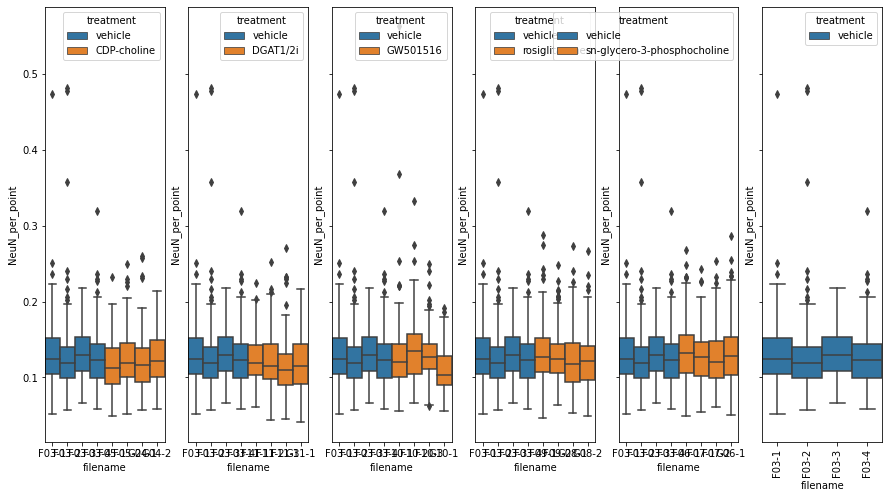

In [317]:
# also check correlations between different channels (make sure no bleed-through)

# also plot by well (not just filename)

# stats 

# rep images

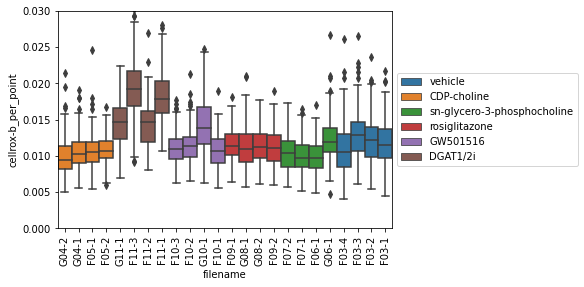

In [313]:
temp = df_filtered[['treatment', 'filename']].drop_duplicates()
order = temp.iloc[np.argsort(temp['treatment'])]['filename']

plt.figure()
sns.boxplot(x='filename', y='cellrox-b_per_point', data=df_filtered, hue = 'treatment', width=1, order = order , dodge=False)
plt.xticks(rotation=90)
plt.ylim(0,0.03)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

None

In [ ]:
sns.boxplot(x='well_name', y='bodipy-b_per_point', data=df_filtered)
plt.figure()

In [226]:
np.unique(df_filtered['treatment'], return_counts=True)
#np.unique(df_filtered['line'], return_counts=True)

(array(['CDP-choline', 'DGAT1/2i', 'GW501516', 'rosiglitazone',
        'sn-glycero-3-phosphocholine', 'vehicle'], dtype=object),
 array([577, 623, 642, 801, 841, 909]))

In [ ]:
# checks to run 

In [ ]:
# plots 

In [ ]:
# stats

In [ ]:
# rep images

In [ ]:
# load im_data.to_csv('./im_data.csv') and cell_data.to_csv('./cell_data.csv')
# concatenate with im_keep info downloaded from labelbox and only consider images that are labeled 'keep' in >=2 cases / individuals 
# then load those results and concatenate with im_data

In [ ]:
# what checks am I going to do for this analysis
# e.g. check out strong mito - neun correlations: because TUJ was included, NeuN was near the mitohealth channel and there is bleed through
# determine checks
# determine how will plot data & do stats
# determimne what will consider significant
# determine if and how will combine batches
# also need to check correlations between bodipy and cellrox

In [19]:
im_data = pd.read_csv('./im_data.csv')
cell_data = pd.read_csv('./cell_data.csv')
all_data = pd.merge(im_data, cell_data, on = 'unique_image_ID')

In [27]:
all_data['cellrox-b_per_point'] = all_data['cellrox-b']/all_data['Npoints']
all_data['mito-b_per_point'] = all_data['mito-b']/all_data['Npoints']
all_data['bodipy-b_per_point'] = all_data['bodipy-b']/all_data['Npoints']

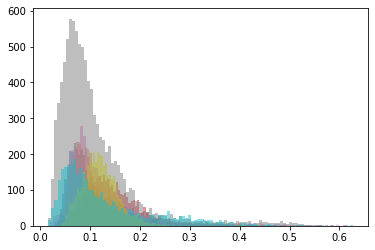

In [21]:
for i in np.unique(all_data['batch']):
    temp = all_data[all_data['batch']==i]
    plt.hist(temp['NeuN_per_point'], 100, alpha=.5)
    None

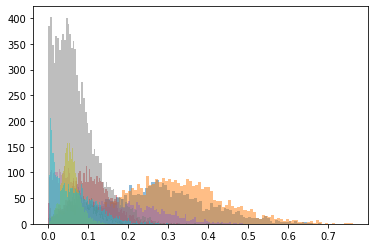

In [24]:
for i in np.unique(all_data['batch']):
    temp = all_data[all_data['batch']==i]
    plt.hist(temp['DAPI_per_point'], 100, alpha=.5)
    None

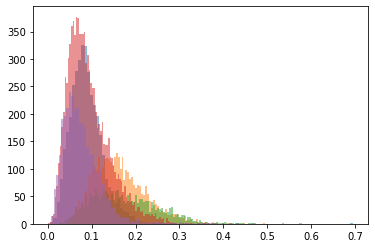

In [39]:
d = all_data.dropna(subset='mito-b')
for i in np.unique(d['batch']):
    temp = d[d['batch']==i]
    plt.hist(temp['mito-b_per_point'], 100, alpha=.5)
    None

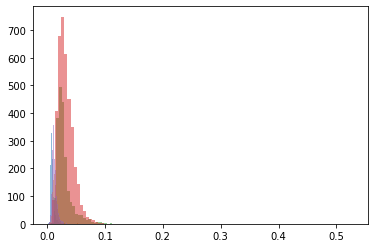

In [31]:
d = all_data.dropna(subset='cellrox-b')
for i in np.unique(d['batch']):
    temp = d[d['batch']==i]
    plt.hist(temp['cellrox-b_per_point'], 100, alpha=.5)
    None

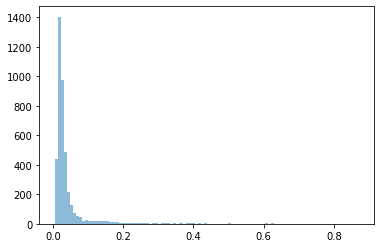

In [41]:
d = all_data.dropna(subset='bodipy-b')
for i in np.unique(d['batch']):
    temp = d[d['batch']==i]
    plt.hist(temp['bodipy-b_per_point'], 100, alpha=.5)
    None

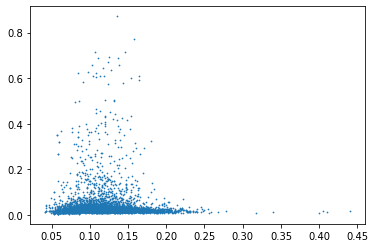

In [42]:
plt.scatter(d['NeuN_per_point'], d['bodipy-b_per_point'], .5)

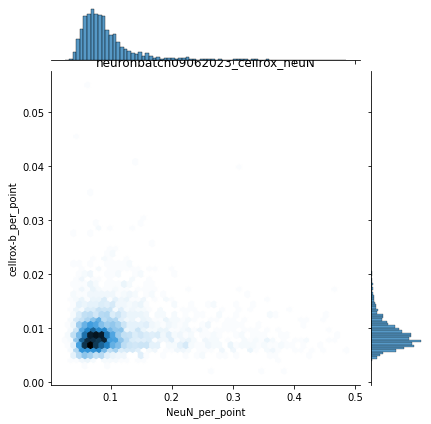

<Figure size 432x288 with 0 Axes>

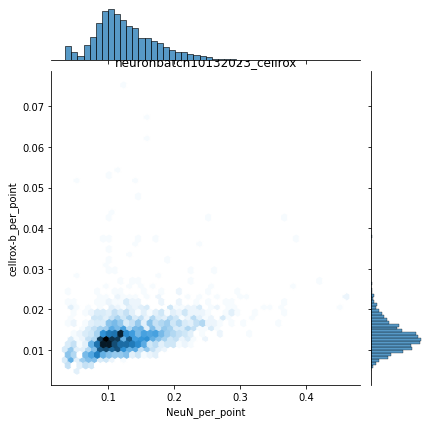

<Figure size 432x288 with 0 Axes>

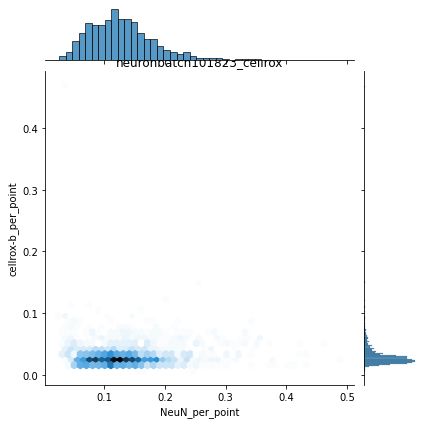

<Figure size 432x288 with 0 Axes>

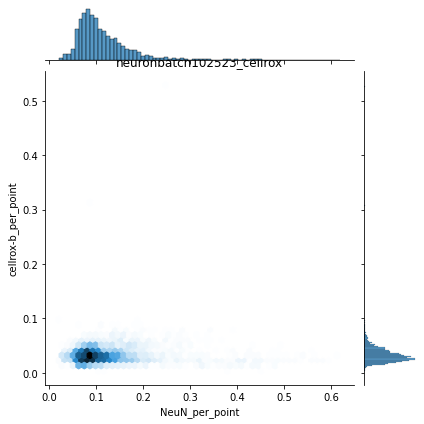

<Figure size 432x288 with 0 Axes>

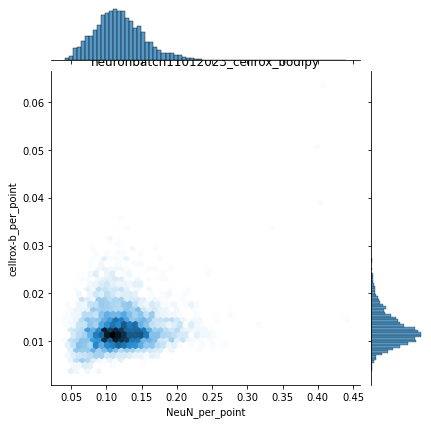

<Figure size 432x288 with 0 Axes>

In [60]:

d = all_data.dropna(subset='cellrox-b')
for i in np.unique(d['batch']):
    temp = d[d['batch']==i]
    sns.jointplot(data = temp, x = 'NeuN_per_point', y='cellrox-b_per_point',kind='hex')
    plt.title(i)
    plt.figure()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


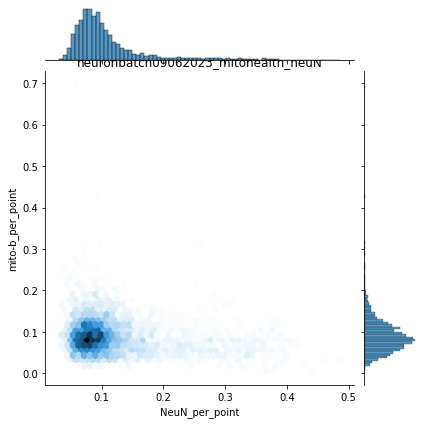

<Figure size 432x288 with 0 Axes>

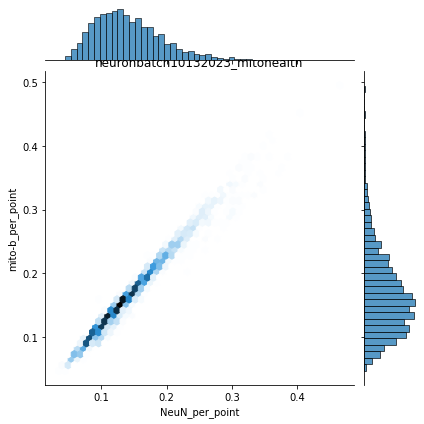

<Figure size 432x288 with 0 Axes>

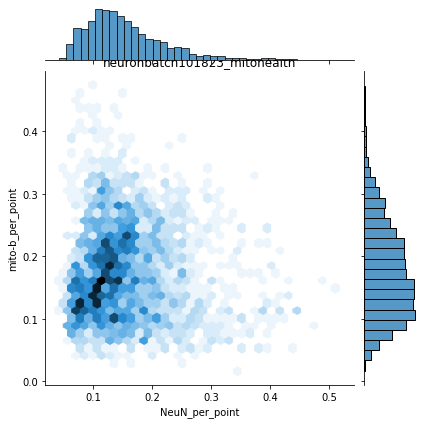

<Figure size 432x288 with 0 Axes>

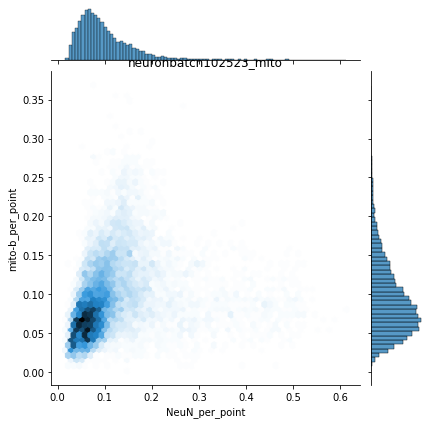

<Figure size 432x288 with 0 Axes>

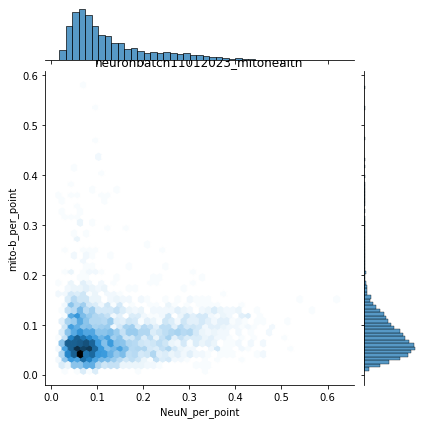

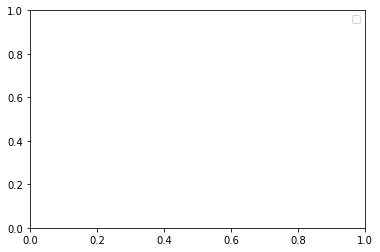

In [59]:

d = all_data.dropna(subset='mito-b')
for i in np.unique(d['batch']):
    temp = d[d['batch']==i]
    sns.jointplot(data = temp, x = 'NeuN_per_point', y='mito-b_per_point',kind='hex')
    plt.title(i)
    plt.figure()

In [34]:
d

,Unnamed: 0_x,filename,fileID,batch,well_name,slurm_file,treatment,line,job_done,unique_image_ID,...,NeuN_per_point,DAPI_per_point,keep_cell,mito,mito-b,bodipy,bodipy-b,cellrox-b_per_point,mito-b_per_point,bodipy-b_per_point
4409,43,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24399566_0.out,vehicle,Y622,True,8482391828,...,0.399729,0.012143,False,NaN,NaN,23.182841,23.169428,0.050427,NaN,0.007657
4410,43,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24399566_0.out,vehicle,Y622,True,8482391828,...,0.120340,0.033556,True,NaN,NaN,15.460327,15.446913,0.012855,NaN,0.015129
4411,43,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24399566_0.out,vehicle,Y622,True,8482391828,...,0.115221,0.064261,True,NaN,NaN,11.408174,11.394761,0.010705,NaN,0.012359
4412,43,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24399566_0.out,vehicle,Y622,True,8482391828,...,0.143165,0.026068,True,NaN,NaN,25.911445,25.898032,0.011060,NaN,0.014222
4413,43,F03-1,0,neuronbatch11012023_cellrox_bodipy,F03,slurm-24399566_0.out,vehicle,Y622,True,8482391828,...,0.108945,0.056144,True,NaN,NaN,483.667186,483.653772,0.010556,NaN,0.183759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,66,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24399715_23.out,DGAT1/2i,Y622,True,6931193250,...,0.058409,0.074480,False,NaN,NaN,22.844552,22.835498,0.013579,NaN,0.018023
8584,66,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24399715_23.out,DGAT1/2i,Y622,True,6931193250,...,0.096353,0.057423,True,NaN,NaN,46.064005,46.054951,0.019483,NaN,0.026886
8585,66,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24399715_23.out,DGAT1/2i,Y622,True,6931193250,...,0.063182,0.104210,False,NaN,NaN,12.434362,12.425307,0.014963,NaN,0.019817
8586,66,G11-1,23,neuronbatch11012023_cellrox_bodipy,G11,slurm-24399715_23.out,DGAT1/2i,Y622,True,6931193250,...,0.085634,0.061463,True,NaN,NaN,20.289889,20.280834,0.020218,NaN,0.023338
